In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
torch.manual_seed(0)
np.random.seed(0)

In [3]:
num_points = 100

key_size = 2
memory_size = num_points * 2
value_size = 2

learning_rate = 3e-4
num_epochs = 50000

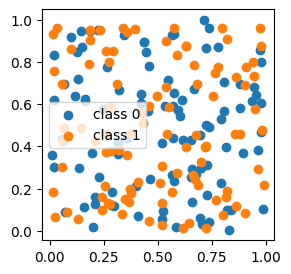

In [4]:
# Class 0 and 1
data_class0 = np.random.rand(num_points, key_size)
data_class1 = np.random.rand(num_points, key_size)
labels_class0 = np.hstack([np.zeros((num_points, 1)), np.ones((num_points, 1))])
labels_class1 = np.hstack([np.ones((num_points, 1)), np.zeros((num_points, 1))])

plt.figure(figsize = (3, 3))
plt.scatter(data_class0[:, 0], data_class0[:, 1], label = 'class 0')
plt.scatter(data_class1[:, 0], data_class1[:, 1], label = 'class 1')
plt.legend()
plt.show()

In [5]:
data = []
labels = []

data.append(data_class0)
labels.append(labels_class0)

data.append(data_class1)
labels.append(labels_class1)

# combine data and labels
data = np.vstack(data)
labels = np.concatenate(labels)

data_tensor = torch.tensor(data, dtype = torch.float32)
labels_tensor = torch.tensor(labels, dtype = torch.float32)

In [6]:
# initial W_keys and W_values
init_W_keys = data_tensor.clone()
init_W_values = torch.tensor(np.random.rand(memory_size, value_size), dtype = torch.float32)

In [7]:
class KeyValueMemory(nn.Module):
    def __init__(
            self,
            key_size,
            memory_size,
            value_size,
            W_keys,
            W_values,
        ):
        super(KeyValueMemory, self).__init__()
        self.key_size = key_size
        self.memory_size = memory_size
        self.value_size = value_size
        self.W_keys = nn.Parameter(W_keys) # (memory_size, key_size)
        self.W_values = nn.Parameter(W_values) # (memory_size, value_size)

    def forward(self):
        # compute similarity scores
        attention_weights = torch.matmul(self.W_keys, self.W_keys.detach().T) / self.key_size ** 0.5 # (memory_size, memory_size)
        attention_weights = torch.softmax(attention_weights, dim = -1)
        output = torch.matmul(attention_weights, torch.sigmoid(self.W_values)) # (memory_size, value_size)
        return output

In [8]:
# model, loss, and optimizer
model = KeyValueMemory(
    key_size = key_size,
    memory_size = memory_size,
    value_size = value_size,
    W_keys = init_W_keys,
    W_values = init_W_values,
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# Training
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model()
    loss = criterion(outputs, labels_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

/Users/sixingchen/Desktop/Codes/Project_Sampling_RNN/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [50/50000], Loss: 0.2631
Epoch [100/50000], Loss: 0.2624
Epoch [150/50000], Loss: 0.2616
Epoch [200/50000], Loss: 0.2609
Epoch [250/50000], Loss: 0.2601
Epoch [300/50000], Loss: 0.2595
Epoch [350/50000], Loss: 0.2588
Epoch [400/50000], Loss: 0.2581
Epoch [450/50000], Loss: 0.2574
Epoch [500/50000], Loss: 0.2567
Epoch [550/50000], Loss: 0.2560
Epoch [600/50000], Loss: 0.2552
Epoch [650/50000], Loss: 0.2544
Epoch [700/50000], Loss: 0.2534
Epoch [750/50000], Loss: 0.2522
Epoch [800/50000], Loss: 0.2508
Epoch [850/50000], Loss: 0.2491
Epoch [900/50000], Loss: 0.2471
Epoch [950/50000], Loss: 0.2447
Epoch [1000/50000], Loss: 0.2420
Epoch [1050/50000], Loss: 0.2390
Epoch [1100/50000], Loss: 0.2357
Epoch [1150/50000], Loss: 0.2320
Epoch [1200/50000], Loss: 0.2282
Epoch [1250/50000], Loss: 0.2241
Epoch [1300/50000], Loss: 0.2198
Epoch [1350/50000], Loss: 0.2154
Epoch [1400/50000], Loss: 0.2109
Epoch [1450/50000], Loss: 0.2063
Epoch [1500/50000], Loss: 0.2017
Epoch [1550/50000], Loss: 0.19

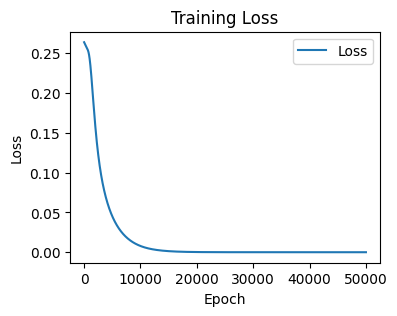

In [9]:
plt.figure(figsize = (4, 3))
plt.plot(losses, label = 'Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(200, 2) (200, 2)


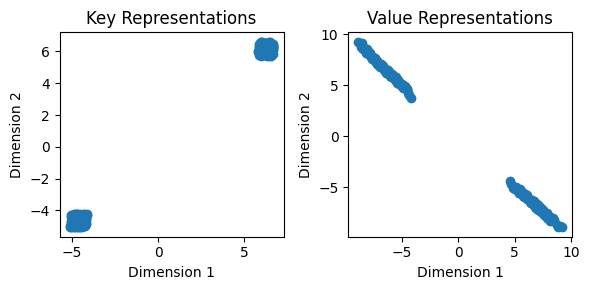

In [10]:
# Visualize keys and values
keys = model.W_keys.detach().numpy()
values = model.W_values.detach().numpy()
print(keys.shape, values.shape)

plt.figure(figsize = (6, 3))

# keys
plt.subplot(1, 2, 1)
plt.scatter(keys[:, 0], keys[:, 1])
plt.title('Key Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# plt.legend()

# values
plt.subplot(1, 2, 2)
plt.scatter(values[:, 0], values[:, 1])
plt.title('Value Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# plt.legend()

plt.tight_layout()
plt.show()